# Portfolio analysis
 ### In this project, I compare the performance of four individual securities with that of a portfolio consisting of the same four securities. It will be seen that two of the four stocks will underperform over a time period of about four years, while two will perform quite well.

The stocks under consideration are General Electric, JP Morgan, Microsoft and Proctor & Gamble.

Let us check for which time period we have data on the stocks in the dataset
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
dati = pd.read_csv("small_portfolio.csv", index_col=0)
#check start and end of dataset
print(dati.head())
print(dati.tail())



               GE    JPM    MSFT     PG
date                                   
2015-01-02  25.06  62.49  46.760  90.44
2015-01-05  24.60  60.55  46.325  90.01
2015-01-06  24.07  58.98  45.650  89.60
2015-01-07  24.08  59.07  46.230  90.07
2015-01-08  24.37  60.39  47.590  91.10
               GE     JPM   MSFT     PG
date                                   
2018-03-21  13.88  114.74  92.48  77.04
2018-03-22  13.35  109.95  89.79  76.41
2018-03-23  13.07  107.01  87.18  75.91
2018-03-26  12.89  110.31  93.78  76.41
2018-03-27  13.44  108.17  89.47  77.79


Adesso calcolo la performance di un portafoglio di quattro azioni. Moltiplicare il rendimento medio di ciascun titolo per il suo peso in portafoglio è un modo molto rapido e semplice per calcolare la performance del portafoglio in un determinato periodo di tempo.

Calcolo i rendimenti percentuali delle azioni nei dati del DataFrame confrontando il prezzo di oggi con quello di ieri.

In [2]:
# Calculating daily portfolio returns
returns = dati.pct_change()
returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436


After calculating the average returns, I assign the weights, which are 0.05, 0.4, 0.3 and 0.25. I multiply the percentage returns with the weights and take the total sum to calculate the total portfolio performance and print the result.

In [3]:

meanDailyReturns = returns.mean()

weights = np.array([0.05, 0.4, 0.3, 0.25])

portReturn = np.sum(meanDailyReturns * weights)
print(portReturn)

0.0005099122350279334


We see the development of the performance over time by calculating the cumulative performance. I create a column for returns and then calculate the cumulative returns with numpy's function cumprod()

In [4]:
returns["Portfolio"]=returns.dot(weights)

daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                  GE       JPM      MSFT        PG  Portfolio
date                                                         
2018-03-21  0.553871  1.836134  1.977759  0.851835   1.498435
2018-03-22  0.532721  1.759482  1.920231  0.844870   1.454413
2018-03-23  0.521548  1.712434  1.864414  0.839341   1.422270
2018-03-26  0.514366  1.765242  2.005560  0.844870   1.473479
2018-03-27  0.536313  1.730997  1.913388  0.860128   1.451525


We create a plot to investigate when the portfolio was performing well and when it was not. Note that performance has been increasing over time.

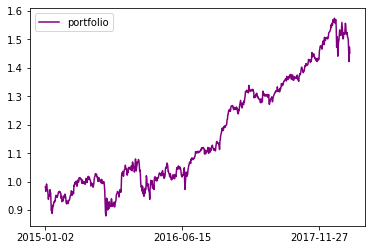

In [5]:
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio,
color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

We calculate the risk of the 4 stocks in the portfolio. I start by recalculating the daily returns, then proceed by calculating the covariance matrix on the daily returns and multiply by 250 trading days in a year. I then calculate the variance of the portfolio, applying the formula: transposed weights *(covariance matrix * weights). Looking at the covariance matrix, MSFT has the highest risk because the variance is 5.4%, which is the highest percentage. 

In [6]:
daily_returns = dati.pct_change()

cov_matrix = (daily_returns.cov())*250
print (cov_matrix)

port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

print(str(np.round(port_variance, 4) * 100) + "%")


            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645
2.55%


In the variance calculation, the weights and variances are squared. Due to this squaring, the variance is no longer in the same unit as the original data. By taking the root of the variance, the standard deviation is returned to the original unit of measurement and is therefore much easier to interpret.
The standard deviation indicates by how much the portfolio return may deviate from the historical average return. If a portfolio has an average rate of return of 12% and a standard deviation of 4%, its return will vary from 8 to 16%. The historical average return of this particular portfolio is actually close to zero. With an average standard deviation of about 16%, it means that you are getting a bad deal.

In [7]:
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
print(str(np.round(port_standard_dev, 4) * 100) + "%")

15.959999999999999%


The annualised return is the performance over any period of time, either 4 months or 5 years for example. Since our dataset contains 3 years of data, we enter 36 months in the exponential to calculate the returns in a year. 252 represents the days in a year devoted to trading. From here we can calculate annualised returns. It is possible to use the annualised return to compare portfolios with different time periods.

In [8]:
annual_returns = daily_returns.mean() * 252 
annualized_return = ((1 + annual_returns)**(12/36))-1
print(annualized_return)


GE     -0.060271
JPM     0.060832
MSFT    0.071017
PG     -0.012265
dtype: float64


Ordering

In [9]:
sorted_annualized_returns = annualized_return.sort_values(ascending=False)
print(sorted_annualized_returns)

MSFT    0.071017
JPM     0.060832
PG     -0.012265
GE     -0.060271
dtype: float64


Let's take a look at the annualised yields of the four bonds.

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

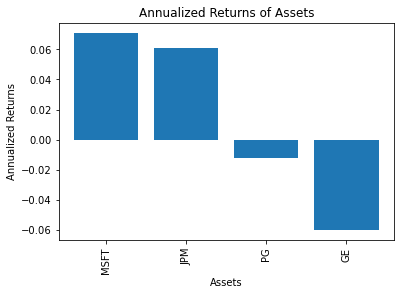

In [10]:

plt.bar(sorted_annualized_returns.index, sorted_annualized_returns)
plt.ylabel("Annualized Returns")
plt.xlabel("Assets")
plt.title("Annualized Returns of Assets")
plt.xticks(rotation = 90)



Now we talk about risk-adjusted return, which defines the return of an investment by measuring how much risk is involved in producing that return, and this allows you to choose between different investment options and tells you whether a return justifies a risk. This is why we use the Sharpe ratio. All you need is the portfolio return, the return you get on a risk-free asset, for example the interest rate on your savings account, and the standard deviation of the portfolio. When the sharpe ratio is less than 1, the return does not exceed the risk.

Taking the example of MSFT, this had an annualised return of 7 %. Let us first calculate the annualised volatility. It turns out to be 23%. As can be seen, this is a relatively high value compared to the return. We define a risk-free rate at 0. Finally, we calculate the Sharpe ratio between return and risk. The result is 0.30, which is actually not as interesting as the annualised return would suggest. When the sharpe ratio is less than 1, the return does not outweigh the risk.
For example among portfolios, the sharpe ratio at 30 % with risk 0 indicates that it is still better to bet on MSFT (Microsoft).

In [11]:

vol_dati = returns.std() * np.sqrt(250)
print(vol_dati)

rfr = 0

sharpe_ratio = ((annualized_return - rfr ) / vol_dati)
print(sharpe_ratio)


GE           0.214445
JPM          0.216010
MSFT         0.232495
PG           0.143683
Portfolio    0.159582
dtype: float64
GE          -0.281055
JPM          0.281617
MSFT         0.305456
PG          -0.085358
Portfolio         NaN
dtype: float64


Let us see if there is skewness in the data. Calculating only mean and standard deviation does not give the best understanding of where to invest, so we need to calculate skewness, which indicates whether the distribution is symmetrical or skewed, and kurtosis. The plot shows us whether there is skewness. For example MSFT has a negative skewness since the mean is to the left of the fashion and median, so there are more positive returns compared to a normal distribution with mean 0. A negative skewness can be recognised by the fact that there is a bulge on the right. 

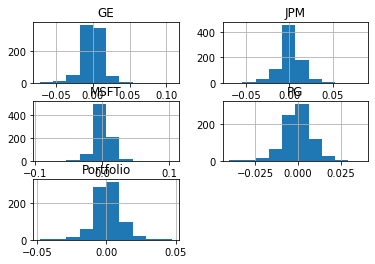

In [12]:

returns.hist()
plt.show()

Now let's put it all into numbers, calculating skewness and kurtosis to show what to expect from an investment in terms of returns and volatility, which is an indicator of risk. As can be seen, the average return of MSFT is close to zero. The distribution is skewed, as the skewness is more than +0.5, which is not a good sign. However, the kurtosis is greater than 3, which means it is slightly fat-tailed and the extremes are at the extremes of the distribution, which is bad news. 

In [13]:
# Calculating mean
print("mean: ", returns.mean()*100)

mean:  GE          -0.067513
JPM          0.076914
MSFT         0.090690
PG          -0.014422
Portfolio    0.050991
dtype: float64


In [14]:
# Calculating standard deviation (volatility)
print("Std. dev :", returns.std()*100)

Std. dev : GE           1.356269
JPM          1.366165
MSFT         1.470427
PG           0.908732
Portfolio    1.009283
dtype: float64


In [15]:
# Calculating skewness
print("skewness :", returns.skew())

skewness : GE           0.177313
JPM          0.018815
MSFT         0.515431
PG          -0.259934
Portfolio   -0.178871
dtype: float64


In [16]:
# Calculating kurtosis
print("curtosi :", returns.kurtosis())

curtosi : GE           7.766370
JPM          3.831448
MSFT         9.882177
PG           2.848092
Portfolio    3.886279
dtype: float64


A good measure of risk should perhaps focus on potential losses, rather than on overall fluctuations as measured by volatility. This is where the Sortino ratio comes in. The Sortino ratio is a variant of the Sharpe ratio. It differentiates harmful volatility from overall volatility using only the standard deviation of the portfolio's negative returns. Thus, instead of the normal standard deviation, the Sortino ratio calculates the standard deviation of only the negative returns, the so-called downside risk.

First, I define the risk-free rate and the target return of the security, assuming that both are zero. Now I create a new DataFrame, which only stores negative return numbers, e.g. of MSFT. For this I use the .loc function on the yield data and select the negative yields below the target using the mathematical symbol of 'strictly below'. Now for simplicity, I take the average of the JPM returns for the expected return. With this new variable I calculate the standard deviation. These are all the ingredients needed to calculate the Sortino ratio, which is similar to the Sharpe ratio. Here the sortino ratio emphasises that it is not recommended to invest in MSFTs.

In [17]:

rfr = 0
target = 0
negative_returns = returns.loc[returns["MSFT"] < target]

# Calculating the expected return and standard deviation of negative returns
expected_return = dati["MSFT"].mean()
neg_stdev = negative_returns["MSFT"].std()

# Sortino ratio
sortino_ratio = (expected_return - rfr)/neg_stdev

# Print
print("Rendimento atteso :", expected_return*100)
print("Rischio negativo :", neg_stdev*100)
print("Sortino ratio :", sortino_ratio)

Rendimento atteso : 6036.810578105781
Rischio negativo : 1.061557684607299
Sortino ratio : 5686.747565054812


The maximum draw-down refers to the largest percentage loss from peak to trough in the market. A large draw-down is usually followed by investors fleeing a fund, resulting in further losses. For this reason, most investors look at previous draw-downs to assess risk. First, it is necessary to find the maximum value of the time series, using a window of 252 trading days, equal to 1 year of trading. I use min_periods=1 to start calculating from day 1 and let the first 250-day window simply expand. I now calculate the daily drawdowns by comparing the prices with their moving maximum. Then I simply choose the smallest number of these daily draw-downs using the rolling.min function. Since these numbers are negative, the smallest number provides the largest draw-down. Finally, I plot the results.
In this case we take the MSFT stock and calculate the maximum draw-down. We can see that the maximum draw-down is at the end of 2015 and shows that at this point the portfolio suffered the largest performance drop in a single day.



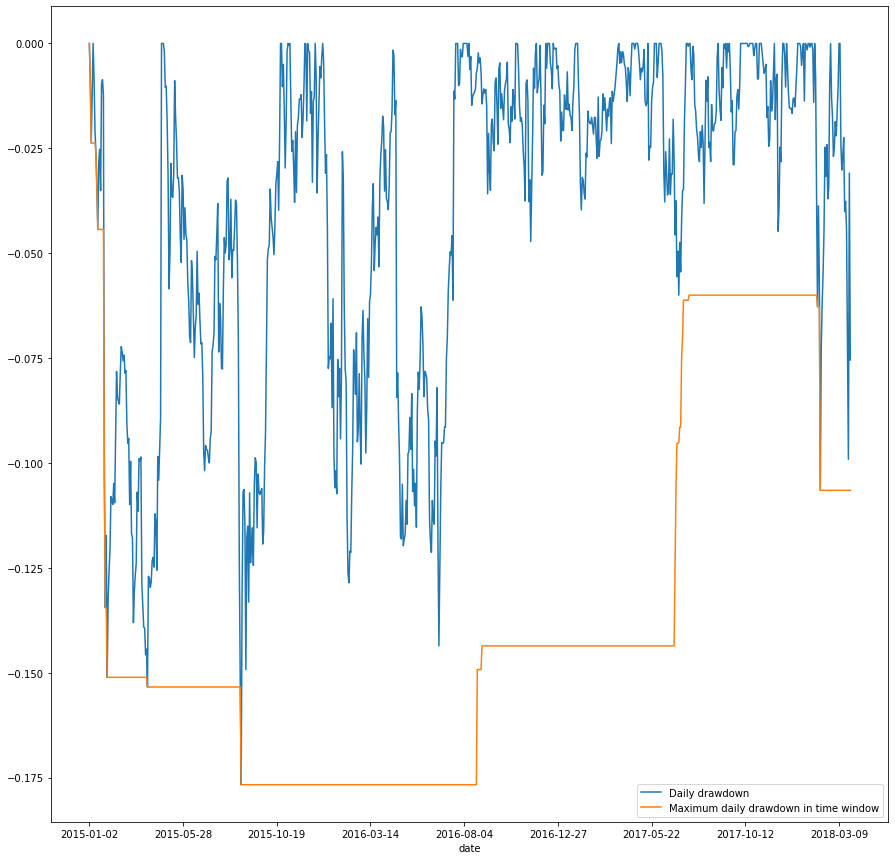

In [18]:
dati_msft = dati["MSFT"]
# Calculating max value
roll_max = dati_msft.rolling(center = False, min_periods=1, window=252).max()

# Calculating daily draw-down concerning the maximum
daily_draw_down=dati_msft/roll_max - 1

# Calculating daily draw-down concerning the minimum
max_daily_draw_down = daily_draw_down.rolling(center=False, min_periods=1, window=252).min()

# Plot
plt.figure(figsize=(15,15))
daily_draw_down.plot(label="Daily drawdown")
max_daily_draw_down.plot(label = "Maximum daily drawdown in time window")
plt.legend()
plt.show()

In [19]:
#pip install PyPortfolioOpt --user

# Portfolio optimization

How does one devise an investment strategy that offers the desired trade-off of risk and return, or in simple terms: which assets to include in the portfolio? Harry Markowitz devised the efficient frontier optimisation in 1952, which provides a solid framework for combining securities in a portfolio. The key insight is that by combining assets with different expected returns and volatilities, a mathematically optimal allocation can be decided. Efficient frontier optimisation is a constrained optimisation problem, in which one tries to minimise the variance of the portfolio by setting weights.
PyPortfolioOpt is an incredibly useful library to help find optimal portfolios. 

In [20]:
#portfolio optimization
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier


The expected_return and risk_models functions need daily price data as input, so I take this set of securities and their prices over time. Then, I take the historical average return to calculate the expected return of the portfolio. Finally, I use the sample covariance function to obtain a measure of risk.
After calculating the expected return mu and the risk sigma from the price dataset df, one is ready to calculate the efficient frontier, which can be created with one line of code. 

In [21]:
# Expected returns
mu = expected_returns.mean_historical_return(dati)

# Covariance matrix
Sigma = risk_models.sample_cov(dati)

# Efficient frontier
ef = EfficientFrontier(mu, Sigma)
print (mu, Sigma)

GE     -0.175812
JPM     0.185643
MSFT    0.223083
PG     -0.045684
dtype: float64             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


The objective of the Markowitz portfolio optimisation problem is to minimise the portfolio variance, taking into account a number of constraints. Portfolio variance = transposed weights * covariance matrix * weights. ByPyPortfolioOpt I call the covariance matrix sigma, to indicate that it is a sample covariance.

As can be seen, the functions ofPyPortfolioOpt, to calculate sigma, give the exact same result if one were to calculate the covariance by hand. The same is true for the calculation of the expected return: one can verify that PyPortfolioOpt gives the same result as the manual calculation of annualised daily returns.

In [23]:
# I get the returns
returns_pyp=dati.pct_change()

# Calculating the annualised covariance matrix
covMatrix = returns_pyp.cov()*252

# Calculating the covariance matrix with pyportfolio
Sigma = risk_models.sample_cov(dati)

# I print both matrices
print (covMatrix, Sigma)

            GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


## Maximum Sharpe portfolio: maximum Sharpe on EF
Most portfolio managers are interested in finding the maximum Sharpe of the portfolio on the efficient frontier when optimising the portfolio. Let us calculate this with PyportfolioOpt. I input the expected returns and the covariance matrix into the efficient frontier function. Then, I use max_sharpe() to obtain the portfolio with the maximum Sharpe ratio and store the portfolio weights in raw_weights. Then, since the raw weights are the direct output of the optimisation problem and are difficult to read, I collect the clean weights, which look neater and better understood.

In [29]:
#Portfolio optimization: Max Sharpe

# I define the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculating weights for maximum sharpe
raw_weights = ef.max_sharpe()
cleaned_weights= ef.clean_weights()
print(cleaned_weights)

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])


Finally, you can get the performance numbers by running portfolio_performance on ef. As you can see, it returns the annualised performance number and annualised volatility, as well as the Sharpe Ratio, so you don't have to calculate them again.

In [30]:
ef.portfolio_performance(verbose=True)


Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 0.96


(0.2071640257389759, 0.19595169737742765, 0.9551538886569297)

## Minimum volatility portfolio: the lowest level of risk on the efficient frontier
The minimum volatility portfolio offers the optimal portfolio for the lowest risk. In this sense it is a special case, as it serves as the "minimum risk benchmark" for all other portfolios on the efficient frontier. Its performance over time is surprisingly good, which is why some managers choose it as their preferred portfolio. Calculating it is very simple with PyPortfolioOpt. You get the efficient frontier using mu and Sigma. Then, this is where things change: use min_volatility as an optimiser. The rest of the steps are the same; you can get the clean weights this way.

In [31]:
#Minimum volatility optimization

# Define efficient border
ef2 = EfficientFrontier(mu, Sigma)
raw_weights_minvol = ef2.min_volatility()

# I get interpretable performance weights and numbers
cleaned_weights_minvol = ef2.clean_weights()

# Portfolio performance
print(cleaned_weights_minvol)


OrderedDict([('GE', 0.15732), ('JPM', 0.11714), ('MSFT', 0.04704), ('PG', 0.6785)])


And here are the performance numbers. Here is the minimum volatility portfolio. Note that it will generally have a lower performance, a lower return and, for obvious reasons, a lower Sharpe ratio than the maximum Sharpe portfolio.

In [32]:
perf_min_volatility = ef2.portfolio_performance(verbose=True)
perf_min_volatility

Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.35


(-0.026415861751657235, 0.1329238660783018, -0.3491913312566076)